In [1]:
import cv2
print(cv2.__version__)

4.8.1


## Capture Image

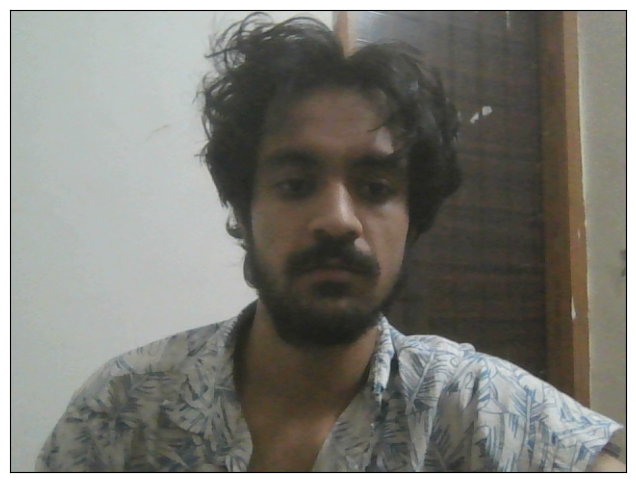

In [2]:
from IPython.display import display
from matplotlib import pyplot as plt
import cv2

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Capture a single frame
ret, frame = cap.read()

if not ret:
    print("Failed to grab frame")
else:
    # Convert the image to RGB (OpenCV uses BGR by default)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the image in a Jupyter cell output
    plt.figure(figsize=(10, 6))
    plt.imshow(frame)
    plt.xticks([]), plt.yticks([])  # Hide tick marks
    plt.show()

# Release the video capture object
cap.release()


1/1 [==============================] - 0s 132ms/step
Surprise


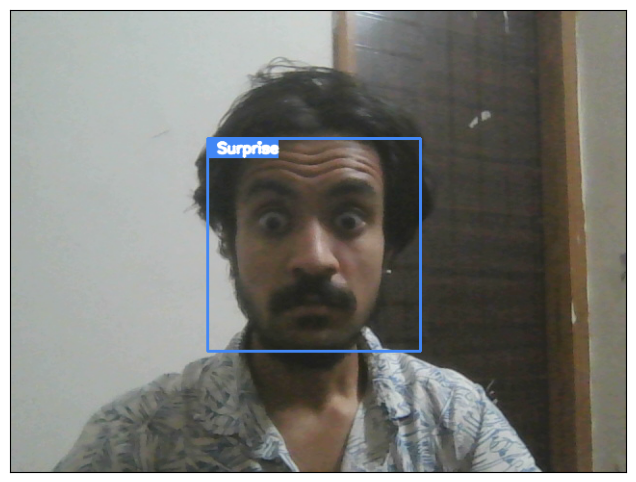

In [14]:
import numpy as np
import cv2
import tensorflow as tf
from IPython.display import display
from matplotlib import pyplot as plt

# Load the Haar cascade for face detection and the model for emotion prediction
face_detection = cv2.CascadeClassifier('haar_cascade_face_detection.xml')
model = tf.keras.models.load_model('expression.model')
labels = ["Neutral","Happy","Sad","Surprise","Angry"]
detected_emotion = ''

# Define the settings for face detection
settings = {
    'scaleFactor': 1.3, 
    'minNeighbors': 5, 
    'minSize': (50, 50)
}

# Initialize the webcam and capture a single frame
cap = cv2.VideoCapture(0)
ret, img = cap.read()
cap.release()

if ret:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    detected = face_detection.detectMultiScale(gray, **settings)
    
    for x, y, w, h in detected:
        cv2.rectangle(img, (x, y), (x+w, y+h), (245, 135, 66), 2)
        cv2.rectangle(img, (x, y), (x+w//3, y+20), (245, 135, 66), -1)
        face = gray[y+5:y+h-5, x+20:x+w-20]
        face = cv2.resize(face, (48,48))
        face = face/255.0
        
        predictions = model.predict(np.array([face.reshape((48,48,1))])).argmax()
        state = labels[predictions]
        detected_emotion = state
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,state,(x+10,y+15), font, 0.5, (255,255,255), 2, cv2.LINE_AA)
        print(state)
    
    # Display the image with detected emotion in a Jupyter cell output
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])  # Hide tick marks
    plt.show()
else:
    print("Failed to grab frame")


In [17]:
import spotipy
import requests
from spotipy.oauth2 import SpotifyClientCredentials
import ipywidgets as widgets
from IPython.display import display, HTML  # Modified import

# Spotify credentials
client_id = 'f9d219a77add42c99a19def689b5dfb6'
client_secret = '9931eebbcf3f472db1ef1dda50d72422'

# Initialize Spotify API client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Map emotion to genre
emotion_to_genre = {
    "Neutral": "rock",
    "Happy": "pop",
    "Sad": "blues",
    "Surprise": "electronic",
    "Angry": "metal"
}


def on_button_click(btn, url):
    display(HTML(f'<a href="{url}" target="_blank">Click here to open in Spotify</a>'))

def create_card(track):
    song_name = track['name']
    artist_name = track['artists'][0]['name']
    spotify_link = track['external_urls']['spotify']
    
    # Extract the URL for the album art (typically choosing the first image, which is the largest)
    album_art_url = track['album']['images'][0]['url']
    
    # Create an image widget for the album art
    album_art = widgets.Image(
        value=requests.get(album_art_url).content,
        format='png',
        width=150,
        height=150
    )
    
    button = widgets.Button(description="Listen on Spotify", layout=widgets.Layout(width="50%"))
    button.on_click(lambda btn, url=spotify_link: on_button_click(btn, url))
    
    card = widgets.VBox([
        album_art,
        widgets.Label(f"{song_name} by {artist_name}"),
        button
    ])
    
    return card


if detected_emotion not in emotion_to_genre:
    print(f"Emotion {detected_emotion} not mapped to any genre.")
    detected_emotion = "Neutral"  # Default to Neutral if emotion is not in the map


# For logging purpose I am doing this
print(detected_emotion)

# Fetch tracks 
genre = emotion_to_genre[detected_emotion]  # Use the mapped genre
results = sp.search(q='genre:' + genre, type='track', limit=10)

# Create the title and display
title = widgets.Label(f"{detected_emotion} songs")
display(title)

# Display each card
for track in results['tracks']['items']:
    display(create_card(track))

Surprise


Label(value='Surprise songs')